In [2]:
from binn import BINNClassifier, Network, SuperLogger, BINNExplainer, BINN
import pandas as pd

input_data = pd.read_csv("../data/test_qm.csv")
translation = pd.read_csv("../data/translation.tsv", sep="\t")
pathways = pd.read_csv("../data/pathways.tsv", sep="\t")

# Create the model
network = Network(
    input_data=input_data,
    pathways=pathways,
    mapping=translation,
    verbose=False
)

binn = BINN(
    pathways=network,
    n_layers=4,
    dropout=0.2,
    validate=False,
    residual=True
)

/home/erikh/BINN/BINN/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Base case reached
Final number of unique connections in pathway:  1003
Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


In [3]:
from notebooks.util_for_examples import fit_protein_matrix_to_network_input, generate_data
import torch
from pytorch_lightning import Trainer

design_matrix = pd.read_csv('../data/design_matrix.tsv', sep="\t")
protein_matrix = pd.read_csv('../data/test_qm.csv')

protein_matrix = fit_protein_matrix_to_network_input(
    protein_matrix, features=network.inputs)

X, y = generate_data(protein_matrix, design_matrix=design_matrix)

dataloader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(torch.Tensor(X), torch.LongTensor(y)),
                                            batch_size=8,
                                            num_workers=12,
                                            shuffle=True)
trainer = Trainer(max_epochs=5)
trainer.fit(binn, dataloader)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
The number of training batches (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4: 100%|██████████| 25/25 [00:00<00:00, 47.25it/s, loss=0.623, v_num=12, train_loss=0.625, train_acc=0.746]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 25/25 [00:00<00:00, 43.58it/s, loss=0.623, v_num=12, train_loss=0.625, train_acc=0.746]


In [4]:
from binn import BINNExplainer

test_data = torch.Tensor(X)
background_data = torch.Tensor(X)

explainer = BINNExplainer(binn)

In [3]:
importance_df = explainer.explain(test_data, background_data)
importance_df

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [6]:
from binn import complete_shap_sankey

complete_shap_sankey(importance_df, savename='../img/test.png')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [9]:
from binn import ImportanceNetwork

IG = ImportanceNetwork(importance_df)

query_node = 'P02766'

IG.generate_sankey(query_node, upstream=False, savename='../img/sankey.png')

/home/erikh/BINN/BINN/binn/plot.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/erikh/BINN/BINN/binn/plot.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/erikh/BINN/BINN/binn/plot.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
average_importance_df = explainer.explain_average(test_data = test_data, 
                                                  background_data = background_data, 
                                                  nr_iterations= 10, 
                                                  trainer=trainer,
                                                  dataloader= dataloader)
average_importance_df

nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Checkpoint directory /home/erikh/BINN/BINN/notebooks/lightning_logs/version_12/checkpoints exists and is not empty.

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 365 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
365 K     Trainable params
0         Non-trainable params
365 K     Total params
1.464     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=5` reached.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Number of copies made for 4 layers: 26


,source,target,type,source layer,target layer,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_mean,values_std,value
0,A0M8Q6_0,R-HSA-166663_1,0,0,1,6.517172e-05,2.138924e-04,4.609986e-04,4.459276e-04,3.294884e-04,3.778046e-04,4.749357e-04,1.225129e-04,4.082095e-04,3.613083e-04,3.260250e-04,1.369294e-04,3.260250e-04
1,A0M8Q6_0,R-HSA-166663_1,1,0,1,5.553172e-04,3.677715e-04,1.983976e-04,1.651122e-04,7.051072e-04,1.283373e-04,4.469924e-04,2.777166e-04,4.944971e-04,6.258548e-04,3.965104e-04,1.910101e-04,3.965104e-04
2,A0M8Q6_0,R-HSA-977606_1,0,0,1,6.517172e-05,2.138924e-04,4.609986e-04,4.459276e-04,3.294884e-04,3.778046e-04,4.749357e-04,1.225129e-04,4.082095e-04,3.613083e-04,3.260250e-04,1.369294e-04,3.260250e-04
3,A0M8Q6_0,R-HSA-977606_1,1,0,1,5.553172e-04,3.677715e-04,1.983976e-04,1.651122e-04,7.051072e-04,1.283373e-04,4.469924e-04,2.777166e-04,4.944971e-04,6.258548e-04,3.965104e-04,1.910101e-04,3.965104e-04
4,A0M8Q6_0,R-HSA-2029481_1,0,0,1,6.517172e-05,2.138924e-04,4.609986e-04,4.459276e-04,3.294884e-04,3.778046e-04,4.749357e-04,1.225129e-04,4.082095e-04,3.613083e-04,3.260250e-04,1.369294e-04,3.260250e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,R-HSA-1640170_4,root_5,1,4,5,3.376283e-08,2.150635e-08,2.248021e-08,6.823582e-08,3.751228e-09,7.995091e-09,5.234453e-08,7.059143e-08,3.393220e-08,1.617342e-07,4.763339e-08,4.380067e-08,4.763339e-08
6902,R-HSA-1500931_4,root_5,0,4,5,8.719908e-09,3.988763e-09,5.113699e-11,1.467085e-08,2.964294e-09,1.074765e-08,1.379931e-08,5.369390e-09,1.372840e-08,1.207341e-08,8.611312e-09,4.933794e-09,8.611312e-09
6903,R-HSA-1500931_4,root_5,1,4,5,1.631699e-08,1.261350e-08,1.600991e-08,1.453827e-08,2.764331e-10,1.547740e-08,1.672569e-08,5.447209e-09,5.725028e-09,8.869259e-09,1.119997e-08,5.469158e-09,1.119997e-08
6904,R-HSA-400253_4,root_5,0,4,5,2.764047e-09,5.802799e-09,2.447175e-09,5.568687e-09,2.553695e-09,2.324151e-10,4.887883e-10,3.133609e-09,1.758533e-09,4.687817e-09,2.943756e-09,1.826368e-09,2.943756e-09


divide by zero encountered in log2


<AxesSubplot: >

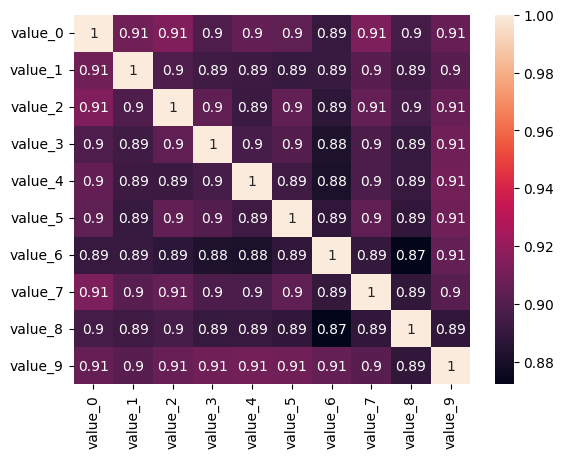

In [8]:
import seaborn as sns
import numpy as np

values_cols = [f'value_{n}' for n in range(10)]

corr = average_importance_df[values_cols].apply(lambda x: np.log2(x)).corr()
sns.heatmap(corr, annot=True)